# Импортируем необходимые библиотеки

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import linregress

# Загрузим данные из файла

Также переведем минуты в секунды и выведем данные

In [2]:
file_path = 'Лаба кинетика.xlsx'
sheet_name = 'Вариант 2'

df = pd.read_excel(file_path, sheet_name=sheet_name)
columns = df.columns

grouped_dfs = []
for i in range(0, len(columns), 6):
    group = df[columns[i:i+5]].copy()
    group.columns = ['t,s', '[A]', '[B]', '[A]exp', '[B]exp']
    group['t,s'] = group['t,s'] * 60
    grouped_dfs.append(group)

for i, group_df in enumerate(grouped_dfs):
    print(f"Набор данных {i+1}:")
    print(group_df)
    print("\n")

Набор данных 1:
       t,s    [A]    [B]   [A]exp   [B]exp
0      0.0  0.030  2.400  0.03030  2.37600
1      0.6  0.030  2.400  0.02970  2.40000
2      1.2  0.030  2.400  0.03000  2.42400
3      1.8  0.030  2.400  0.03030  2.40000
4      2.4  0.030  2.400  0.03030  2.37600
..     ...    ...    ...      ...      ...
995  597.0  0.013  2.408  0.01313  2.40800
996  597.6  0.013  2.408  0.01300  2.43208
997  598.2  0.013  2.408  0.01300  2.38392
998  598.8  0.013  2.408  0.01313  2.43208
999  599.4  0.013  2.408  0.01300  2.43208

[1000 rows x 5 columns]


Набор данных 2:
       t,s    [A]    [B]   [A]exp   [B]exp
0      0.0  0.040  2.400  0.04040  2.37600
1      0.6  0.040  2.400  0.04000  2.37600
2      1.2  0.040  2.400  0.04040  2.40000
3      1.8  0.040  2.400  0.03960  2.40000
4      2.4  0.040  2.400  0.04040  2.40000
..     ...    ...    ...      ...      ...
995  597.0  0.015  2.412  0.01485  2.43612
996  597.6  0.015  2.412  0.01485  2.41200
997  598.2  0.015  2.412  0.01515  2.4

# Построим графики зависимости [A]exp от t и ln(r) от ln([A]exp) и найдем искомые параметры реакции


Набор данных 1:


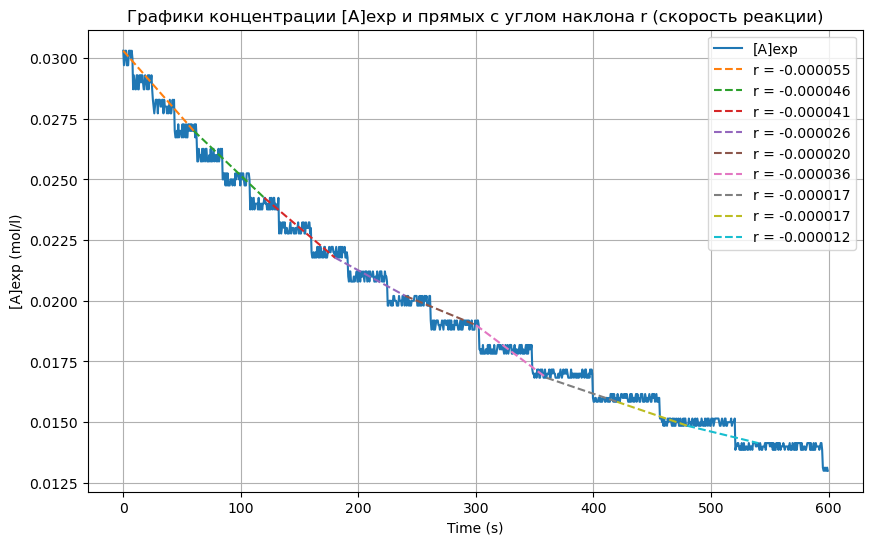

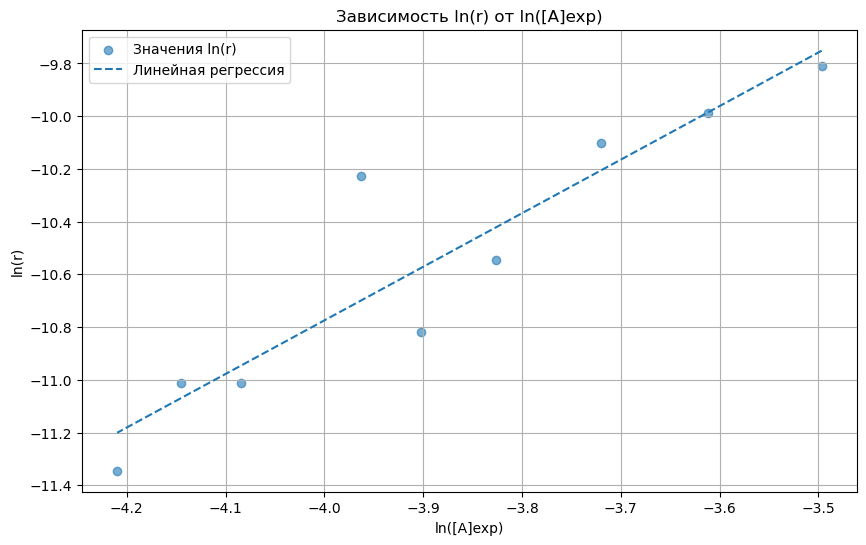

Порядок реакции (угол наклона прямой): 2.031475
Константа скорости реакции (значение экспоненты в точке пересечения прямой с осью ординат): 7.075073e-02



Набор данных 2:


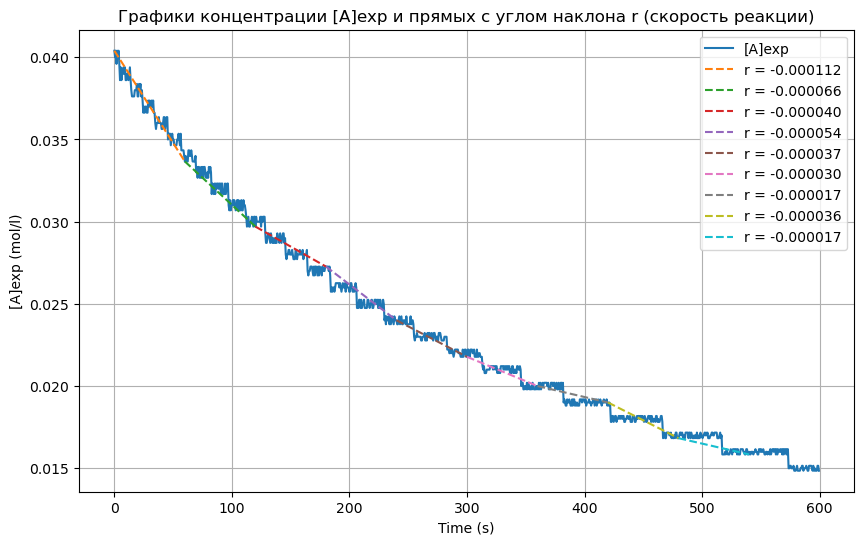

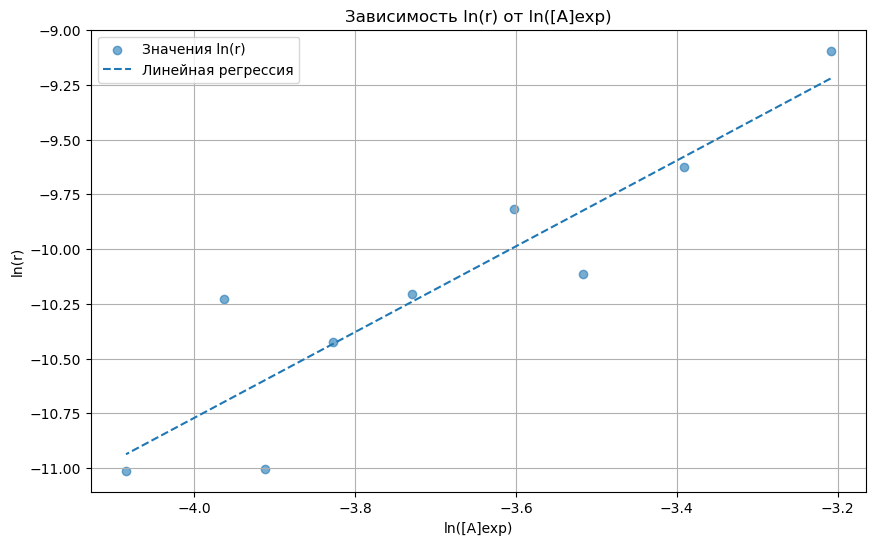

Порядок реакции (угол наклона прямой): 1.959412
Константа скорости реакции (значение экспоненты в точке пересечения прямой с осью ординат): 5.321119e-02



Набор данных 3:


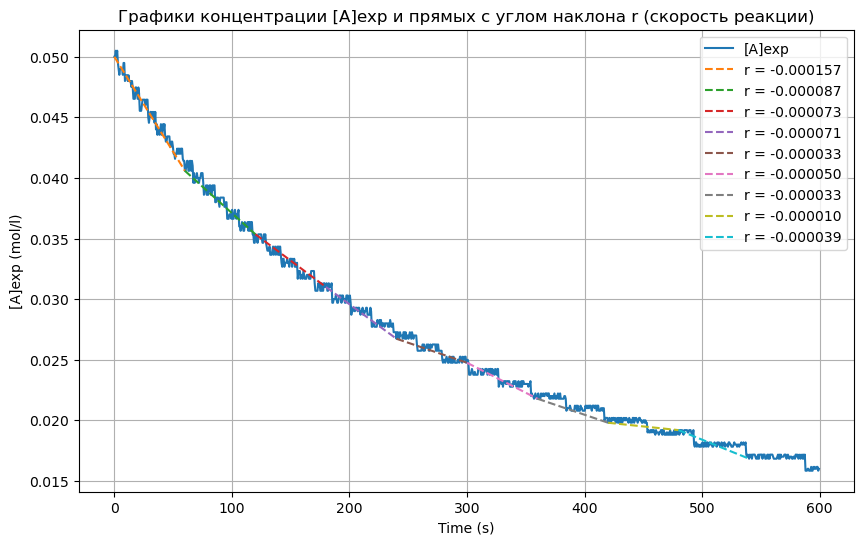

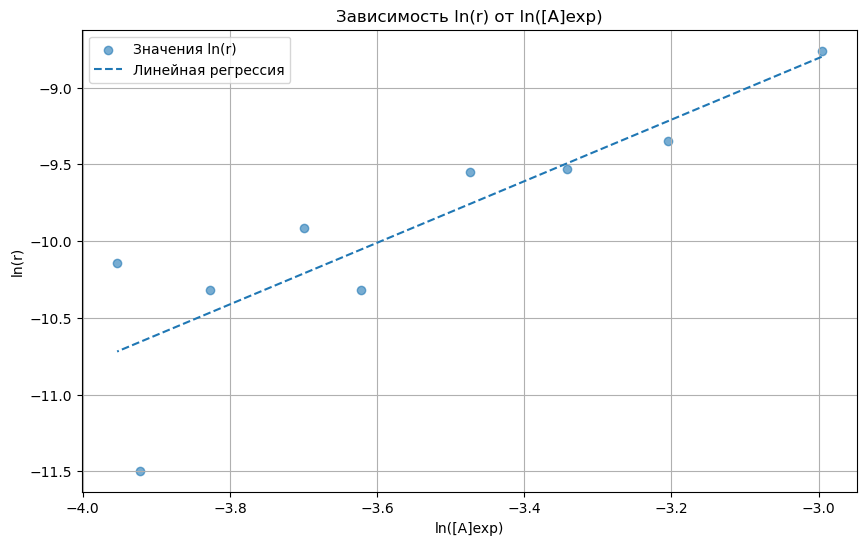

Порядок реакции (угол наклона прямой): 2.004714
Константа скорости реакции (значение экспоненты в точке пересечения прямой с осью ординат): 6.114692e-02



Набор данных 4:


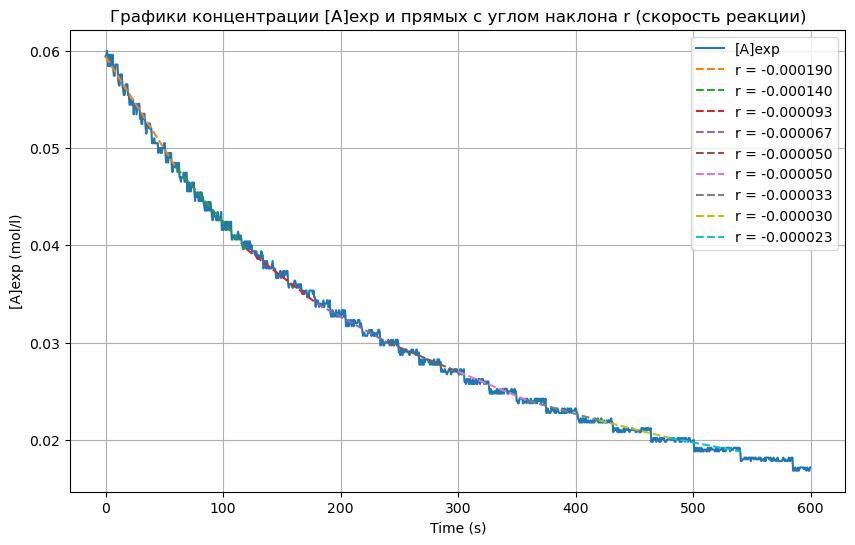

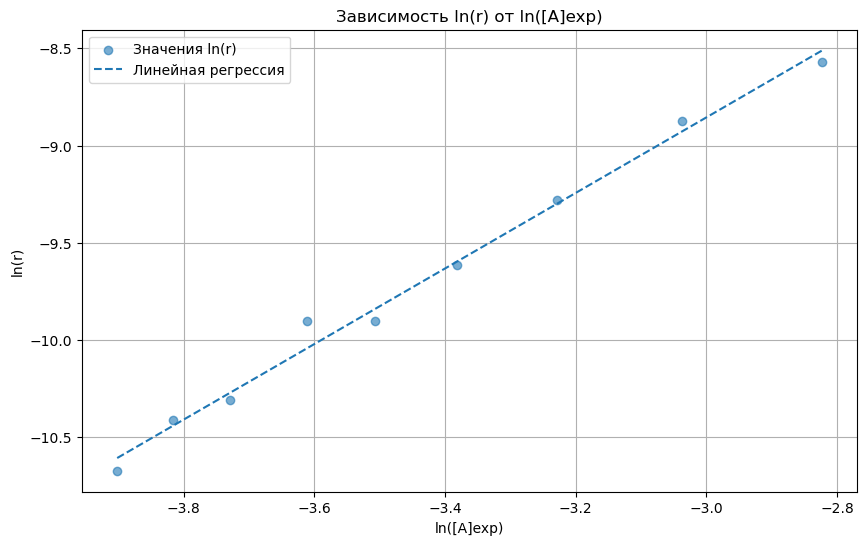

Порядок реакции (угол наклона прямой): 1.942664
Константа скорости реакции (значение экспоненты в точке пересечения прямой с осью ординат): 4.844740e-02



Набор данных 5:


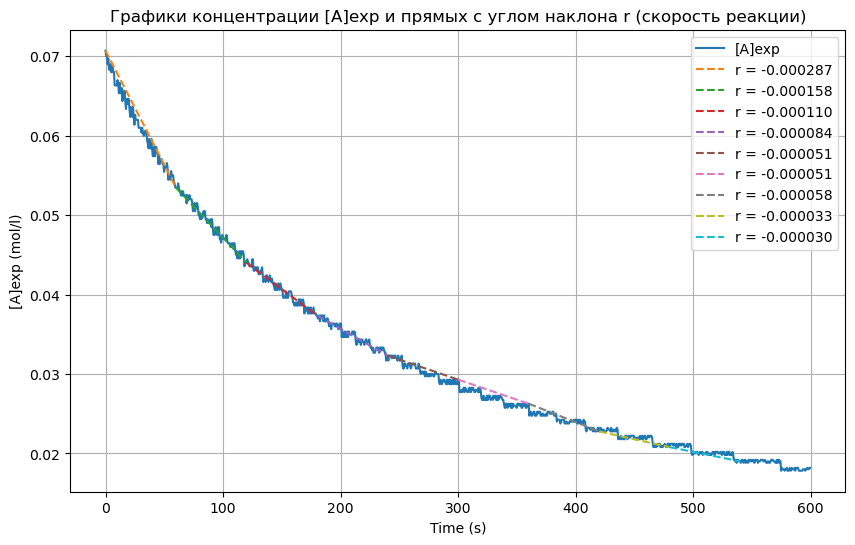

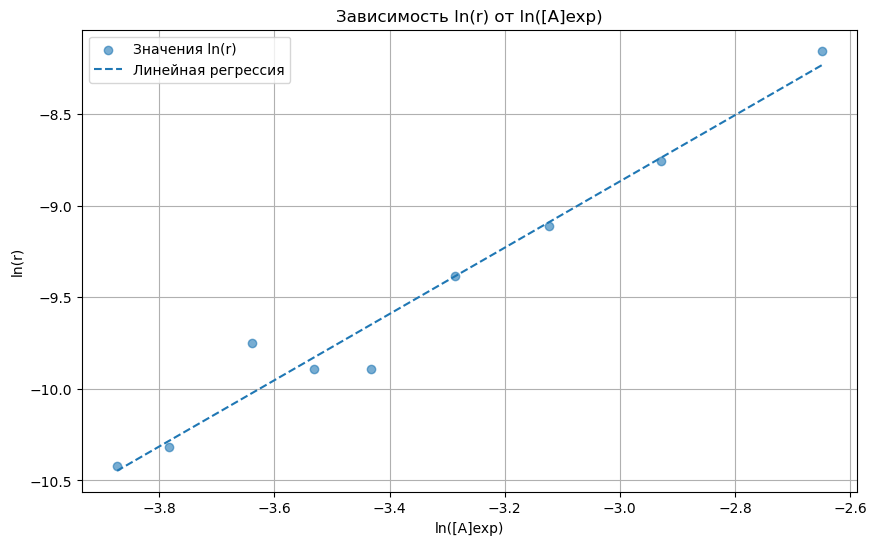

Порядок реакции (угол наклона прямой): 1.807639
Константа скорости реакции (значение экспоненты в точке пересечения прямой с осью ординат): 3.189914e-02



Набор данных 6:


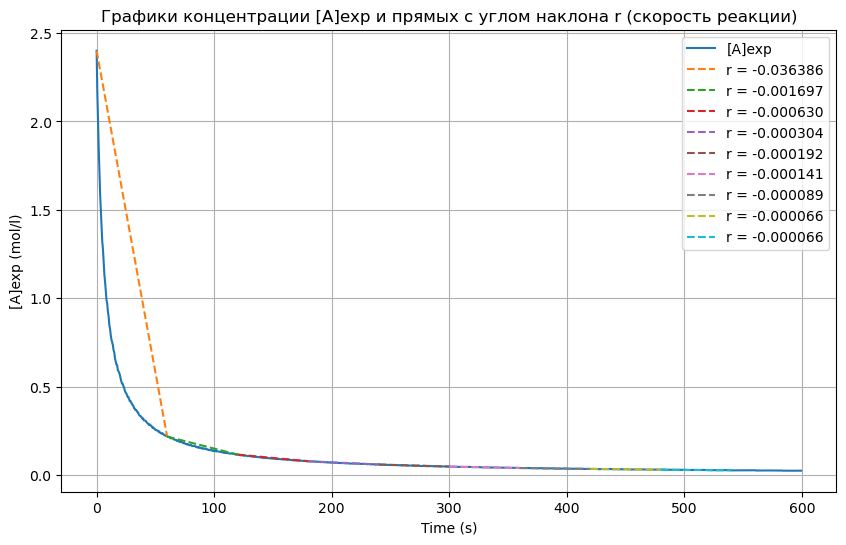

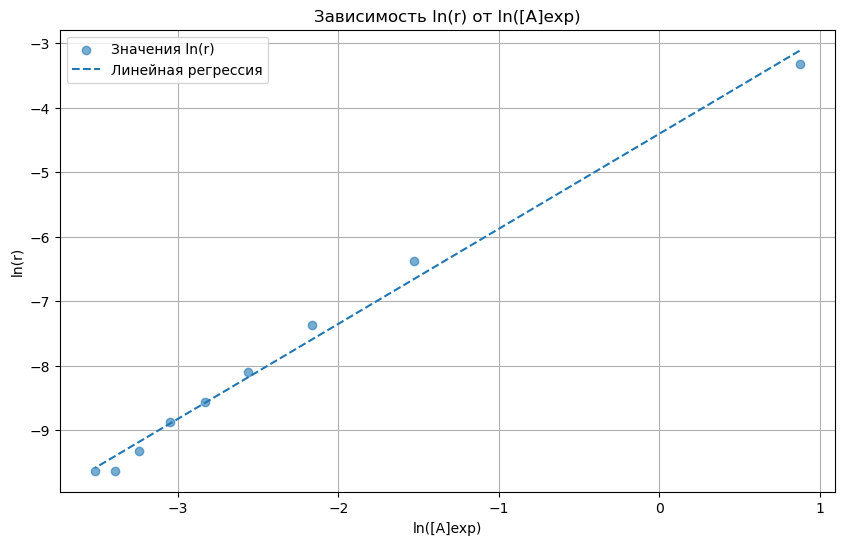

Порядок реакции (угол наклона прямой): 1.472780
Константа скорости реакции (значение экспоненты в точке пересечения прямой с осью ординат): 1.222901e-02



Набор данных 7:


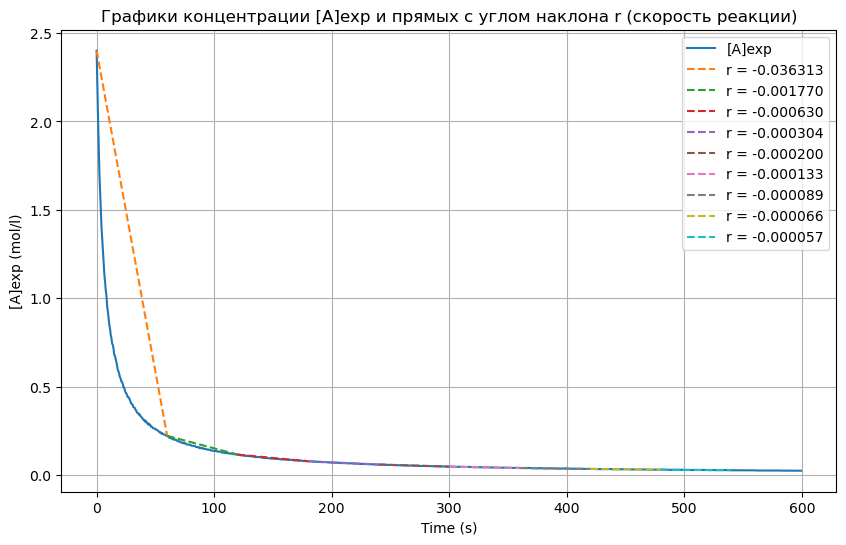

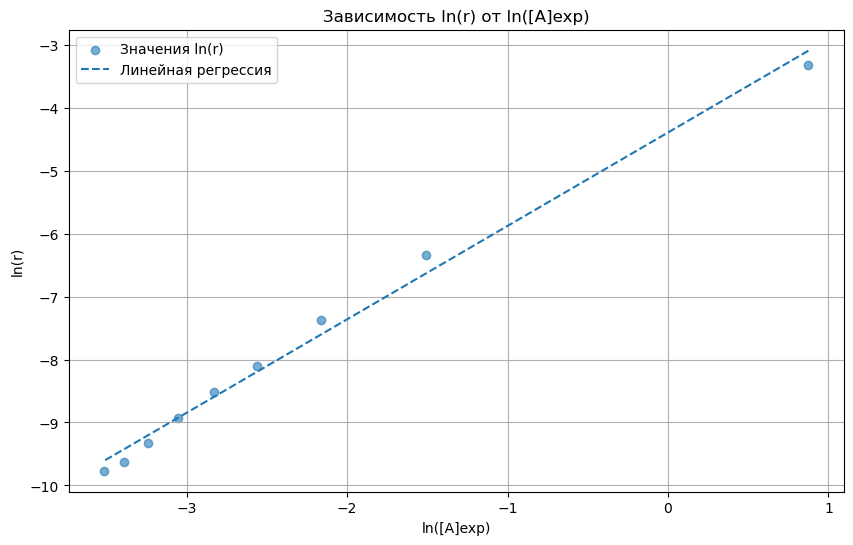

Порядок реакции (угол наклона прямой): 1.484710
Константа скорости реакции (значение экспоненты в точке пересечения прямой с осью ординат): 1.239682e-02



Набор данных 8:


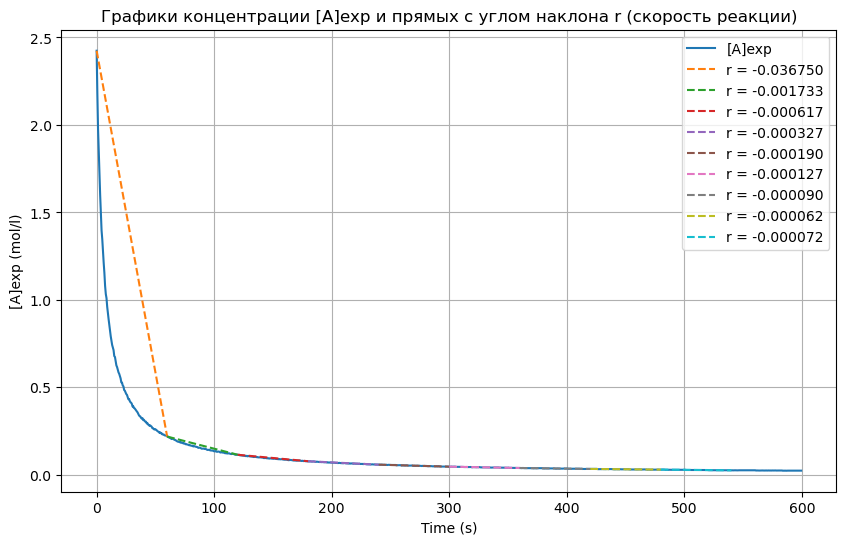

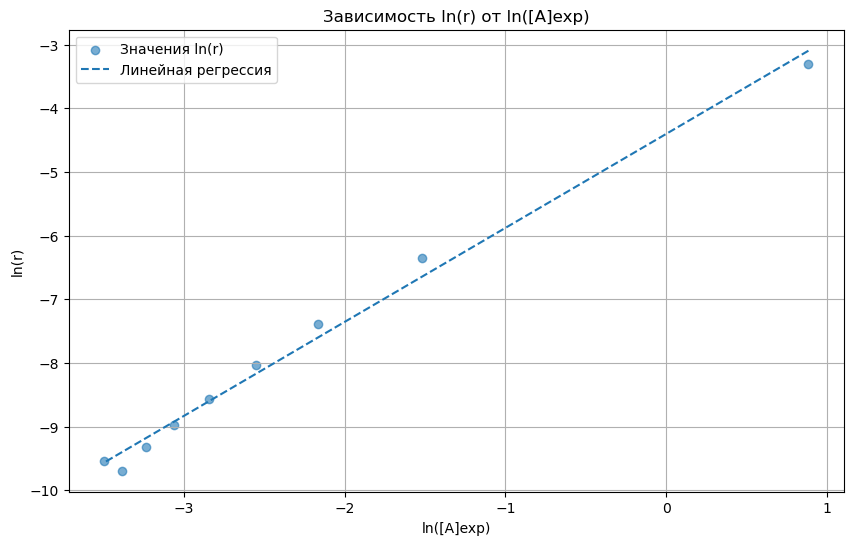

Порядок реакции (угол наклона прямой): 1.476869
Константа скорости реакции (значение экспоненты в точке пересечения прямой с осью ординат): 1.223270e-02



Набор данных 9:


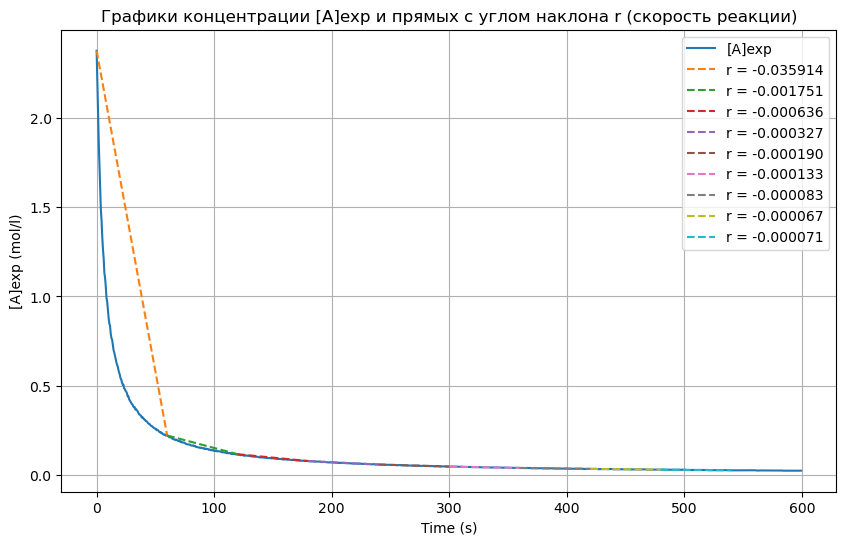

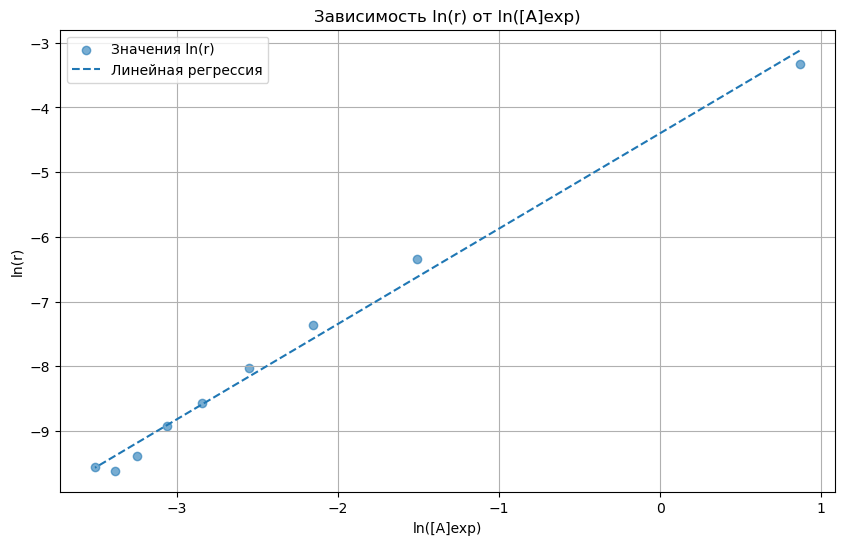

Порядок реакции (угол наклона прямой): 1.474521
Константа скорости реакции (значение экспоненты в точке пересечения прямой с осью ординат): 1.228771e-02



Набор данных 10:


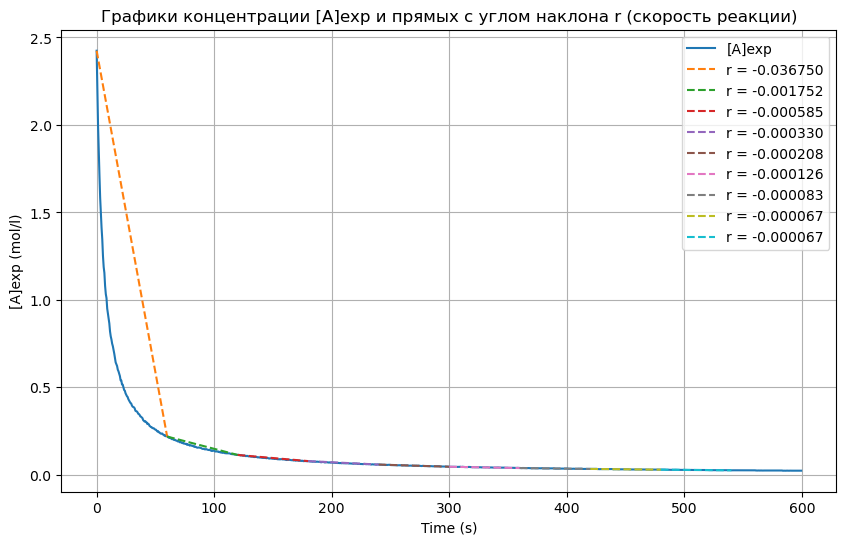

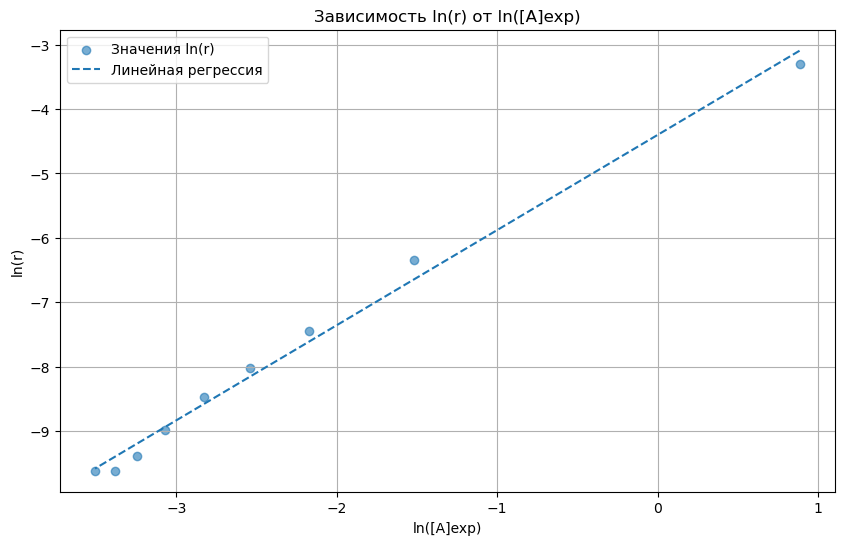

Порядок реакции (угол наклона прямой): 1.477288
Константа скорости реакции (значение экспоненты в точке пересечения прямой с осью ординат): 1.225228e-02




In [3]:
def calculate_reaction_rate_fixed_interval(df, interval=60):
    
    time_points = np.arange(df['t,s'].min(), df['t,s'].max(), interval)
    rates = []
    concentrations = []
    segments = []
    
    for t_start, t_end in zip(time_points[:-1], time_points[1:]):
        a_start = df.loc[df['t,s'] == t_start, '[A]exp'].values[0]
        a_end = df.loc[df['t,s'] == t_end, '[A]exp'].values[0]
        rate = (a_end - a_start) / interval
        rates.append(rate)
        concentrations.append(a_start)
        segments.append((t_start, t_end, a_start, rate))
    
    return df, rates, concentrations, segments

k = []

for i, df in enumerate(grouped_dfs):
    
    print(f'\nНабор данных {i+1}:')
    
    df, rates, concentrations, segments = calculate_reaction_rate_fixed_interval(df)
    
    plt.figure(figsize=(10, 6))
    plt.plot(df['t,s'], df['[A]exp'], label=f'[A]exp') # marker='o' для жирных точек
    for t_start, t_end, a_start, rate in segments:
        t_segment = np.array([t_start, t_end])
        a_segment = a_start + rate * (t_segment - t_start)
        plt.plot(t_segment, a_segment, label=f'r = {rate:.6f}', linestyle='--')
    plt.xlabel('Time (s)')
    plt.ylabel('[A]exp (mol/l)')
    plt.title(f'Графики концентрации [A]exp и прямых с углом наклона r (скорость реакции)')
    plt.legend()
    plt.grid()
    plt.show()

    plt.figure(figsize=(10, 6))
    ln_r = np.log(np.abs(rates))
    ln_a = np.log(concentrations)
    slope, intercept, r_value, p_value, std_err = linregress(ln_a, ln_r)
    plt.scatter(ln_a, ln_r, label='Значения ln(r)', alpha=0.6)
    plt.plot(ln_a, slope * ln_a + intercept, label='Линейная регрессия', linestyle='--')
    plt.xlabel('ln([A]exp)')
    plt.ylabel('ln(r)')
    plt.title(f'Зависимость ln(r) от ln([A]exp)')
    plt.legend()
    plt.grid()
    plt.show()

    k_speed = np.exp(intercept)
    print(f"Порядок реакции (угол наклона прямой): {slope:.6f}")
    print(f"Константа скорости реакции (значение экспоненты в точке пересечения прямой с осью ординат): {k_speed:.6e}")
    k.append(k_speed)
    print('\n')

# Посчитаем срерднюю константу скорости для первых пяти наборов данных

In [4]:
k = k[:5]
sum(k) / len(k)

0.05309107748986362

# Вывод

Так как данные были сгенерированы и загрязнены искусственно, смею предположить, что тут данные не для одной реакции (или же с их генерацией или загрязнением возникли проблемы) и, учитывая, что порядок реакции в задании должен быть целым, будет логично принять первые пять наборов данных за правду, что позволит нам сделать вывод, что порядок реакции равен 2 и константа скорости равна примерно 0.053.